In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# import data 
df = pd.read_csv('C:/Users/Bhavin/Desktop/work/Credit Prediction/Credit-Prediction/Data/german_credit_data.csv')

display(df.head())

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [60]:
#Check for missing values
print(df.isnull().sum())

# There are only Savings accounts and Checking Account columns with missing values.

# 1 :: Fill missing values
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')


display(df.head())


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,no_inf,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,no_inf,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [61]:
# 2 :: Droping the unrequired Columns
df = df.drop(['Unnamed: 0'], axis=1)
display(df.head())

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,no_inf,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,no_inf,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


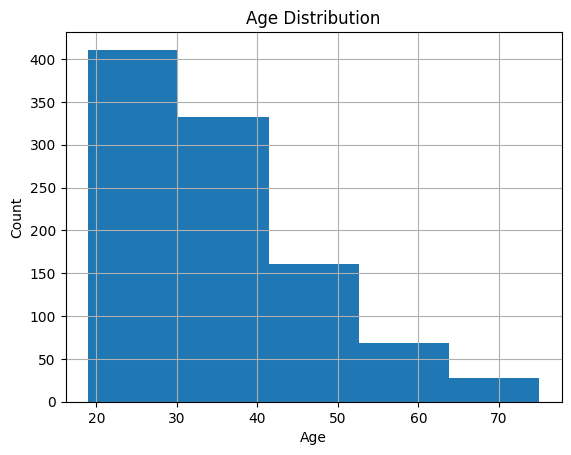

In [62]:
# Examine the Age column and plot its distribution
df['Age'].hist(bins=5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


In [63]:
# 3 :: Bucket the Age column into categories
df['Age'] = pd.cut(df['Age'], bins=[18, 25, 40, 60, 100], labels=[0, 1, 2, 3])
display(df.head())

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,3,male,2,own,no_inf,little,1169,6,radio/TV,good
1,0,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,male,1,own,little,no_inf,2096,12,education,good
3,2,male,2,free,little,little,7882,42,furniture/equipment,good
4,2,male,2,free,little,little,4870,24,car,bad


In [64]:
# 4 :: Convert Sex into One Hot Encoding
df_ = pd.get_dummies(df["Sex"])

#convert boolean to int
df_ = df_.astype(int)
df = pd.concat([df, df_], axis=1)

df = df.drop(columns=["Sex"])
display(df.head())

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,female,male
0,3,2,own,no_inf,little,1169,6,radio/TV,good,0,1
1,0,2,own,little,moderate,5951,48,radio/TV,bad,1,0
2,2,1,own,little,no_inf,2096,12,education,good,0,1
3,2,2,free,little,little,7882,42,furniture/equipment,good,0,1
4,2,2,free,little,little,4870,24,car,bad,0,1


In [65]:
# Find values in Housing column
print(df['Housing'].value_counts())


Housing
own     713
rent    179
free    108
Name: count, dtype: int64


In [66]:
# 5 :: Convert Housing into numerical values
housingMap = {"own": 2, "free": 0, "rent": 1}
df['Housing'] = df['Housing'].map(housingMap)

display(df.head())

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,female,male
0,3,2,2,no_inf,little,1169,6,radio/TV,good,0,1
1,0,2,2,little,moderate,5951,48,radio/TV,bad,1,0
2,2,1,2,little,no_inf,2096,12,education,good,0,1
3,2,2,0,little,little,7882,42,furniture/equipment,good,0,1
4,2,2,0,little,little,4870,24,car,bad,0,1


In [67]:
# Find values in Saving accounts column
print(df['Saving accounts'].value_counts())


Saving accounts
little        603
no_inf        183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


In [68]:
# 6 :: Convert Saving accounts into numerical values
SavingsMap = {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4, "no_inf": 0}
df['Saving accounts'] = df['Saving accounts'].map(SavingsMap)

display(df.head())

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,female,male
0,3,2,2,0,little,1169,6,radio/TV,good,0,1
1,0,2,2,1,moderate,5951,48,radio/TV,bad,1,0
2,2,1,2,1,no_inf,2096,12,education,good,0,1
3,2,2,0,1,little,7882,42,furniture/equipment,good,0,1
4,2,2,0,1,little,4870,24,car,bad,0,1


In [69]:
# Find values in Checking account column
print(df['Checking account'].value_counts())



Checking account
no_inf      394
little      274
moderate    269
rich         63
Name: count, dtype: int64


In [70]:
# 7 :: Convert Checking account into numerical values
CheckingMap = {"little": 1, "moderate": 2, "rich": 3, "no_inf": 0}
df['Checking account'] = df['Checking account'].map(CheckingMap)

display(df.head())


,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,female,male
0,3,2,2,0,1,1169,6,radio/TV,good,0,1
1,0,2,2,1,2,5951,48,radio/TV,bad,1,0
2,2,1,2,1,0,2096,12,education,good,0,1
3,2,2,0,1,1,7882,42,furniture/equipment,good,0,1
4,2,2,0,1,1,4870,24,car,bad,0,1


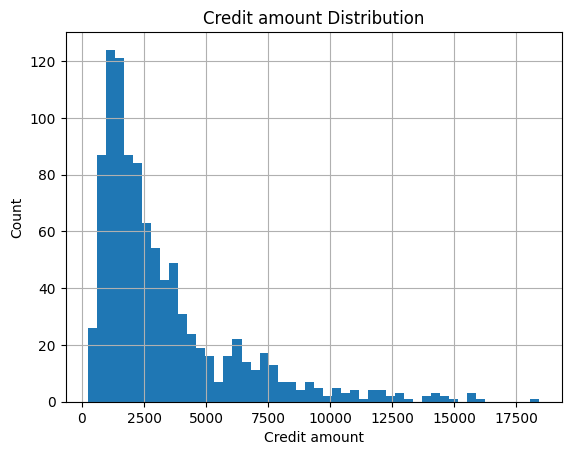

In [71]:
# Checking Credit amount distribution
df['Credit amount'].hist(bins=50)
plt.xlabel('Credit amount')
plt.ylabel('Count')
plt.title('Credit amount Distribution')
plt.show()


In [79]:
import numpy as np
# 8 :: Log transform Credit amount
df['credit_amount_log'] = np.log1p(df['Credit amount'] - df['Credit amount'].min() + 1)
df = df.drop(columns=["Credit amount"])


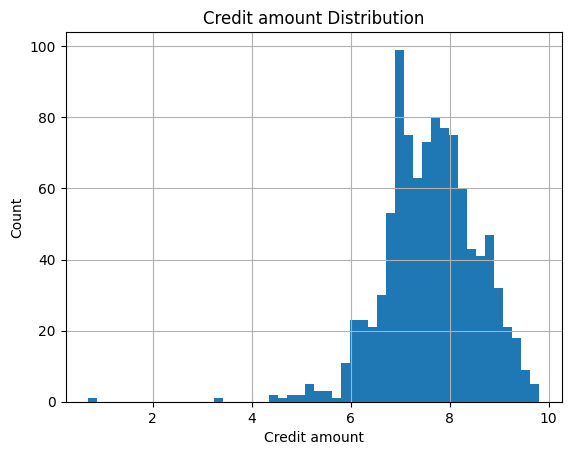

In [80]:
df['credit_amount_log'].hist(bins=50)
plt.xlabel('Credit amount')
plt.ylabel('Count')
plt.title('Credit amount Distribution')
plt.show()

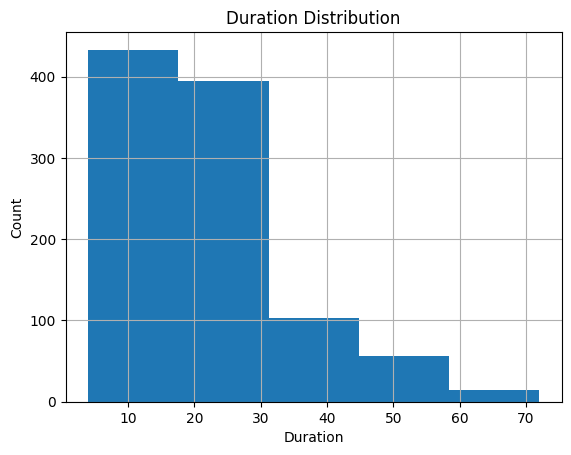

In [81]:
# Looking at the Duration column
df['Duration'].hist(bins=5)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Duration Distribution')
plt.show()


In [82]:
# 9 :: Bucket the Duration column into categories
df['Duration'] = pd.cut(df['Duration'], bins=[0, 12, 24, 48, 100], labels=[0, 1, 2, 3])
display(df.head())



,Age,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,female,male,credit_amount_log
0,3,2,2,0,1,0,radio/TV,good,0,1,6.825460
1,0,2,2,1,2,2,radio/TV,bad,1,0,8.648748
2,2,1,2,1,0,0,education,good,0,1,7.521859
3,2,2,0,1,1,2,furniture/equipment,good,0,1,8.940367
4,2,2,0,1,1,1,car,bad,0,1,8.438583


In [83]:
# 10 :: Convert Purpose into numerical values
print(df['Purpose'].value_counts())


Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


In [ ]:
def categorize_purpose(purpose):
    if purpose in ['car', 'radio/TV','furniture/equipment']:
        return 'High Frequency Purpose'
    elif purpose in ['business', 'education']:
        return 'Medium Frequency Purpose'
    else:
        return 'Low Frequency Purpose'

df['Purpose_Category'] = df['Purpose'].apply(categorize_purpose)

df = df.drop(columns=["Purpose"])

df_ = pd.get_dummies(df["Purpose_Category"])

#convert boolean to int
df_ = df_.astype(int)
df = pd.concat([df, df_], axis=1)

# Drop the Purpose_Category column
df = df.drop(columns=["Purpose_Category"])

display(df.head())


,Age,Job,Housing,Saving accounts,Checking account,Duration,Risk,female,male,credit_amount_log,High Frequency,Low Frequency,Medium Frequency
0,3,2,2,0,1,0,good,0,1,6.825460,1,0,0
1,0,2,2,1,2,2,bad,1,0,8.648748,1,0,0
2,2,1,2,1,0,0,good,0,1,7.521859,0,0,1
3,2,2,0,1,1,2,good,0,1,8.940367,1,0,0
4,2,2,0,1,1,1,bad,0,1,8.438583,1,0,0
